# Twitter Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import os

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gympohnpimol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gympohnpimol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gympohnpimol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
os.chdir(r'/Users/gympohnpimol/Desktop/Hackathons_ML/Sentiment Analysis')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
train.shape

(31962, 3)

In [5]:
test.shape

(17197, 2)

### Data Wranging
Text Cleaning and remove html tags numbers with special Characters

In [6]:
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
token = WordPunctTokenizer()
lemma = WordNetLemmatizer()

In [7]:
re_1 = r'@[A-Za-z0-9_]+'
re_2 = r'http?://[^ ]+'
combine_regex = r'|'.join((re_1, re_2))
negatives = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
shortcuts = {'u': 'you', 'y': 'why', 'r': 'are', 'doin': 'doing', 'hw': 'how', 'k': 'okay', 'm': 'am', 'b4': 'before',
            'idc': "i do not care", 'ty': 'thankyou', 'wlcm': 'welcome', 'bc': 'because', '<3': 'love', 'xoxo': 'love',
            'ttyl': 'talk to you later', 'gr8': 'great', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good', 'h8': 'hate',
            'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
             'irl': 'in real life', 'yolo': 'you only live once'}
neg_regex = re.compile(r'\b(' + '|'.join(negatives.keys()) + r')\b')
sht_regex = re.compile(r'\b(' + '|'.join(shortcuts.keys()) + r')\b')

In [8]:
from bs4 import BeautifulSoup
def tweet_clean(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        removed = souped.decode('utf-8-sig').replace(u'\ufffd', '?')
    except:
        removed = souped
    strip = re.sub(combine_regex,' ', removed)
    lower = strip.lower()
    neg_word = neg_regex.sub(lambda x: negatives[x.group()], lower)
    short_word = sht_regex.sub(lambda x: shortcuts[x.group()], neg_word)
    letter = re.sub('[^a-zA-Z]', ' ', short_word)
    words = [x for x in token.tokenize(letter) if len(x) > 1]
    lemma_word = [lemma.lemmatize(word) for word in words]
    return (' '.join(lemma_word)).strip()

In [9]:
train['clean_tweet'] = train['tweet'].apply(lambda x: tweet_clean(x))
train.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can not use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love you take with you all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they leav...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exam can ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champion cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here am it so great


In [10]:
test['clean_tweet'] = test['tweet'].apply(lambda x: tweet_clean(x))
test.head(10)

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyone to see the new...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way to heal your acne altwaystoheal healt...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday to my amazing hilarious nephew eli a...
5,31968,choose to be :) #momtips,choose to be momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,something inside me dy eye ness smokeyeyes tir...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finished tattoo inked ink loveit thanks aleeee
8,31971,@user @user @user i will never understand why...,will never understand why my dad left me when ...
9,31972,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicure ...


## EDA (Exploratory Data Analysis)
The process of counting the number of occurrences of each word that appears in tweet

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

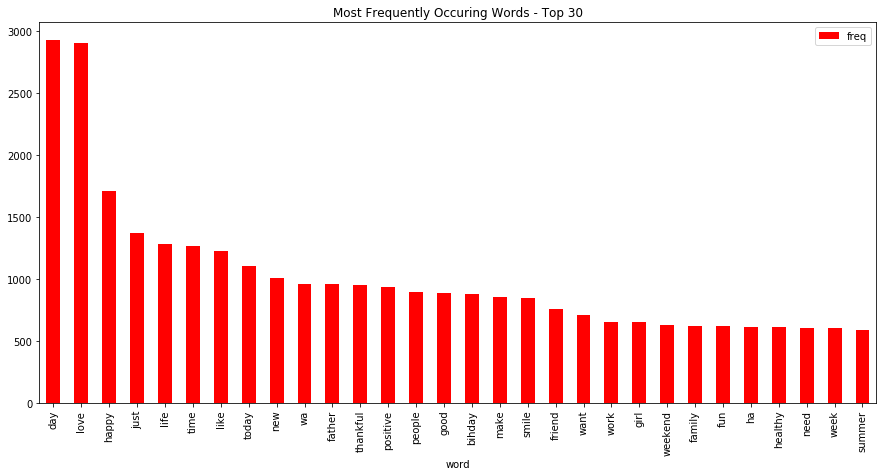

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
word_count = cv.fit_transform(train['clean_tweet'])
sum_word = word_count.sum(axis = 0)
word_freq = [(word, sum_word[0, i]) for word, i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(word_freq,  columns = ['word', 'freq'])
frequency.head(30).plot(x = 'word', y = 'freq', kind = 'bar', figsize = (15, 7), color = 'red')
plt.title('Most Frequently Occuring Words - Top 30')

### generating word cloud for the most common occuring words in the train data

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

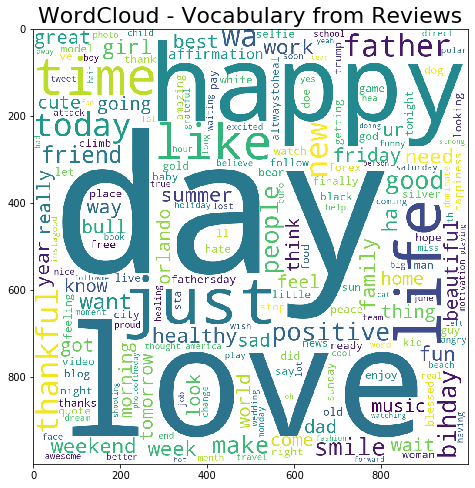

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('WordCloud - Vocabulary from Reviews', fontsize = 22)

Text(0.5, 1.0, 'WordCloud - Normal Vocabulary from Reviews')

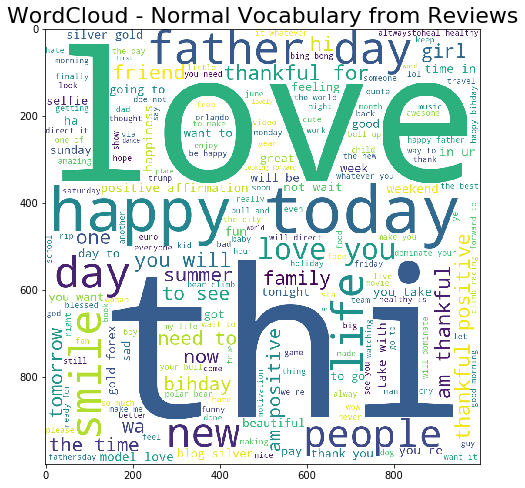

In [13]:
normal_word = ' '.join([text for text in train['clean_tweet'][train['label'] == 0]])
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(normal_word)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('WordCloud - Normal Vocabulary from Reviews', fontsize = 22)

Text(0.5, 1.0, 'WordCloud - Negative Vocabulary from Reviews')

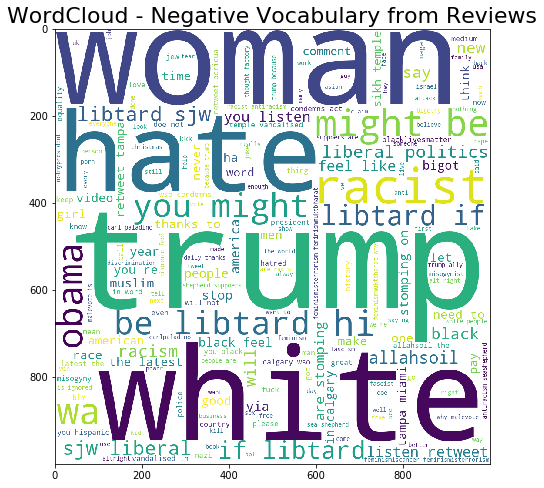

In [14]:
neg_word = ' '.join([text for text in train['clean_tweet'][train['label'] == 1]])
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(neg_word)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('WordCloud - Negative Vocabulary from Reviews', fontsize = 22)

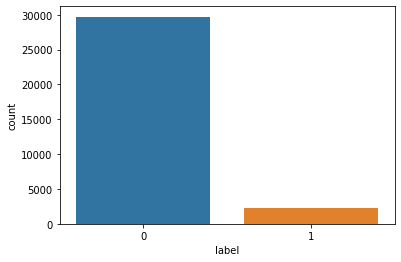

In [15]:
sns.countplot(train['label'])

In [16]:
train = train.drop(['tweet'], axis =1)
train.head(5)

,id,label,clean_tweet
0,1,0,when father is dysfunctional and is so selfish...
1,2,0,thanks for lyft credit can not use cause they ...
2,3,0,bihday your majesty
3,4,0,model love you take with you all the time in ur
4,5,0,factsguide society now motivation


In [17]:
train.shape

(31962, 3)

In [18]:
x = train.drop(['label'], axis = 1)
y = train['label']
x.shape

(31962, 2)

In [19]:
y.shape

(31962,)

### split the data for train and test

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25)

## Model Selection

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer
vec = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word',
                      token_pattern=r'\w{1,}', ngram_range=(1, 4), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')
x_train_count = vec.fit_transform(train['clean_tweet'])
tfidf_model = TfidfTransformer()
x_train_t = tfidf_model.fit_transform(x_train_count)

x_val_count = vec.transform(x_val['clean_tweet'])
x_val_t = tfidf_model.transform(x_val_count)

x_test_count = vec.transform(test['clean_tweet'])
x_test_t = tfidf_model.fit_transform(x_test_count)

In [22]:
x_train_t.shape

(31962, 19497)

In [23]:
x_val_t.shape

(7991, 19497)

In [24]:
x_test_t.shape

(17197, 19497)

In [25]:
model = LogisticRegression(random_state = 2019, C = 1000).fit(x_train_t, y)
y_predict = model.predict(x_val_t)
f1_score(y_val, y_predict, average = 'macro')

/Users/gympohnpimol/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9974538761589069

### Submission

In [26]:
submission = pd.read_csv('submission.csv')
submission.shape

(17197, 2)

In [27]:
y_predict.shape

(7991,)

In [28]:
test.shape

(17197, 3)

In [29]:
y_val.shape

(7991,)

In [30]:
submission = {}
submission['id'] = test['id']
submission['label'] = model.predict(x_test_t)
submission = pd.DataFrame(submission)
submission = submission[['id', 'label']]
submission.to_csv("submisision1.csv", index=False)
print(submission['label'].value_counts())

0    16036
1     1161
Name: label, dtype: int64
